In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [14]:
import snn

In [15]:
# Демонстрация тренировки ИЛИ
X = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]])
y = np.array([-1, 1, 1, 1])
p = snn.PerHebba()

In [44]:
def plot_decision_regions(classifier):
    colors = ('yellow', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors)
    xx, yy = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
    z = classifier.predict(np.array([xx.ravel(),yy.ravel()]).T)
    for i in range(len(z)):
        if z[i] != 0:
            z[i] = 1
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy,z, cmap=cmap)

[[1. 1. 1.]]


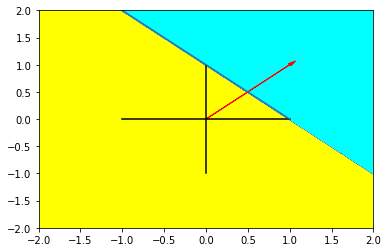

[[2. 0. 0.]]


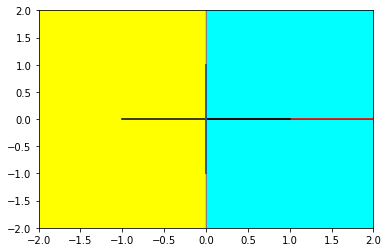

[[ 1.  1. -1.]]


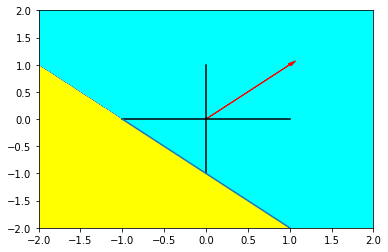

[[ 2.  2. -2.]]


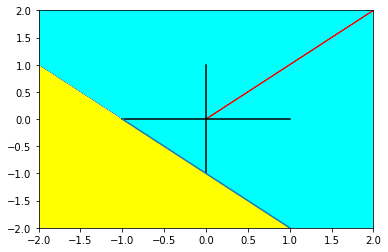

In [45]:
for weights in p.trace_fit(X, y):
    print(weights)
    if weights[0,1] != 0:
        x1 = np.linspace(-1,1,20)
        x2 = lambda x1: weights[0,2]/weights[0,1] - (weights[0,0]/weights[0,1])*x1
        x2 = x2(x1)
    elif weights[0,0] != 0:
        x2 = np.linspace(-1,1,20)
        x1 = lambda x2: weights[0,2]/weights[0,0] - (weights[0,1]/weights[0,0])*x2
        x1 = x1(x2)
    else:
        print("UNSUPORTER WEIGHTS", weights)
    plot_decision_regions(p)
    plt.plot([-1,1],[0,0],c='black')
    plt.plot([0,0],[-1,1],c='black')
    plt.plot(x1,x2)
    plt.arrow(0,0,weights[0,0],weights[0,1],color='r',head_length=0.1, head_width=0.05)
    plt.show()

# Выводы: 
# 1)T характеризует угол между вектором весов и разделяющей поверхностью, чем больше T, тем меньше угол между ними.

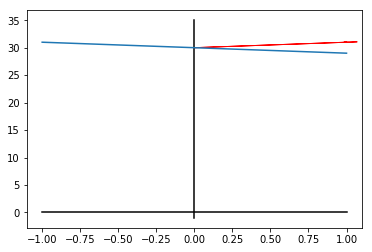

In [47]:
weights = np.array([[1,1,30]])
if weights[0,1] != 0:
    x1 = np.linspace(-1,1,20)
    x2 = lambda x1: weights[0,2]/weights[0,1] - (weights[0,0]/weights[0,1])*x1
    x2 = x2(x1)
elif weights[0,0] != 0:
    x2 = np.linspace(-1,1,20)
    x1 = lambda x2: weights[0,2]/weights[0,0] - (weights[0,1]/weights[0,0])*x2
    x1 = x1(x2)
else:
    print("UNSUPORTER WEIGHTS", weights)
plt.plot([-1,1],[0,0],c='black')
plt.plot([0,0],[-1,35],c='black')
plt.plot(x1,x2)
plt.arrow(0,weights[0,2],weights[0,0],weights[0,1],color='r',head_length=0.1, head_width=0.05)
plt.show()

# 2) T = произведению проекции векторов, исходящих из начала кооржинат к  разделяющей поверхности, на вектор весов -> Вектора весов и признаков можно нормировать.

In [91]:
x = np.linspace(1,5,5)
y = np.linspace(2,6,5)
print(x)
print(y)
xx, yy= np.meshgrid(x,y)
print(xx)
print(yy)

[1. 2. 3. 4. 5.]
[2. 3. 4. 5. 6.]
[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]
[[2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6.]]


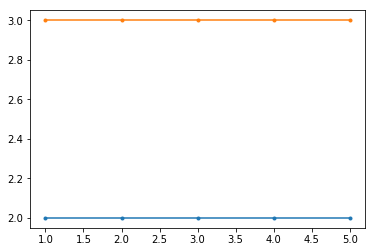

In [101]:
plt.plot(xx[0],yy[0], marker='.')
plt.plot(xx[1],yy[1], marker='.')
plt.show()